# Walmart Sales Dataset of 45stores

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from termcolor import colored
from copy import deepcopy

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

In [486]:
data = pd.read_csv(r'walmart-sales-dataset-of-45stores.csv')

--------------------------------

## General Info

### <span style="color: green"> Holiday Events in the Week: </span>
#### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
#### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
#### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
#### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

<--->

### <span style="color: green"> CPI Col meaning: </span>
#### The Consumer Price Index or CPI measures the overall change in the prices of goods and services that people typically buy over time.

------------------------------------

## EDA

In [487]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [488]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [490]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [491]:
data.set_index('Date', inplace=True)

#### weekly sales can be hugely different with a min of ~200k and a max of ~3.8kk, we will delve into it later plotting the distributions

----------------------

## Holidays Comparison

In [492]:
def assign_holiday(date):
    if date in ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08']:
        return 'Super Bowl'
    elif date in ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06']:
        return 'Labour Day'
    elif date in ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']:
        return 'Thanksgiving'
    elif date in ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']:
        return 'Christmas'
    else:
        return 'Non-Holiday'

In [493]:
hd_comp = deepcopy(data.reset_index())
hd_comp['Date_str'] = hd_comp['Date'].dt.strftime('%Y-%m-%d')
hd_comp['Holiday_label'] = hd_comp['Date_str'].apply(lambda x: assign_holiday(x))
hd_comp

hd_comp_reduced = hd_comp[['Weekly_Sales', 'Unemployment', 'Holiday_label']].groupby('Holiday_label').mean().reset_index()
hd_comp_reduced

,Holiday_label,Weekly_Sales,Unemployment
0,Christmas,9.608331e+05,8.139756
1,Labour Day,1.042427e+06,7.921133
2,Non-Holiday,1.041256e+06,7.993514
3,Super Bowl,1.079128e+06,8.139615
4,Thanksgiving,1.471273e+06,8.139756


##### Unemployment is pretty much the same in every period

Text(0.5, 1.0, 'Sales comparison')

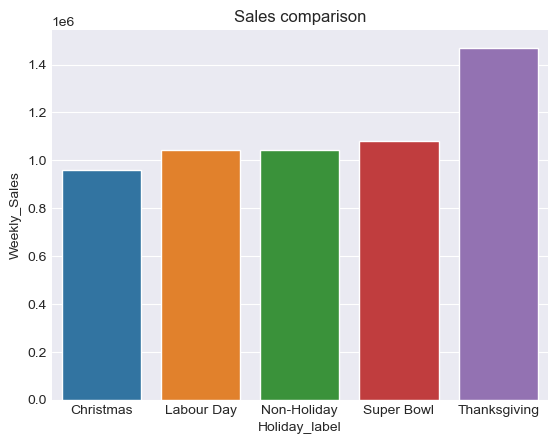

In [494]:
sns.barplot(data=hd_comp_reduced, x='Holiday_label', y='Weekly_Sales')
plt.title("Sales comparison")

### Sales peaks

(<Figure size 1200x500 with 3 Axes>,
 array([<Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>], dtype=object))

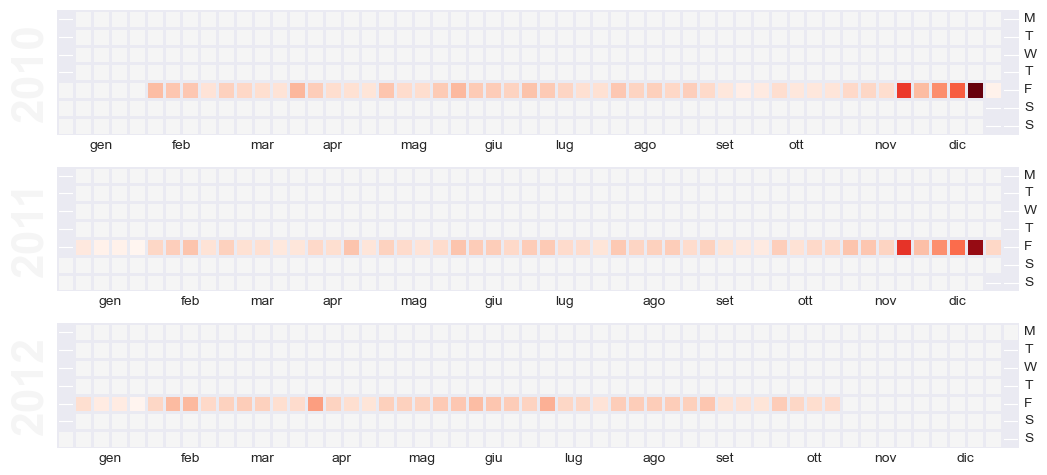

In [573]:
import calmap

calendar_df = deepcopy(data)
calendar_df = calendar_df[['Weekly_Sales']]
calendar_piv = calendar_df.pivot_table(index=calendar_df.index, values='Weekly_Sales', aggfunc='sum').fillna(0.0)
calmap.calendarplot(calendar_piv, daylabels='MTWTFSS', cmap='Reds', fig_kws=dict(figsize=(12, 5)))

### Store comparison WoW

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

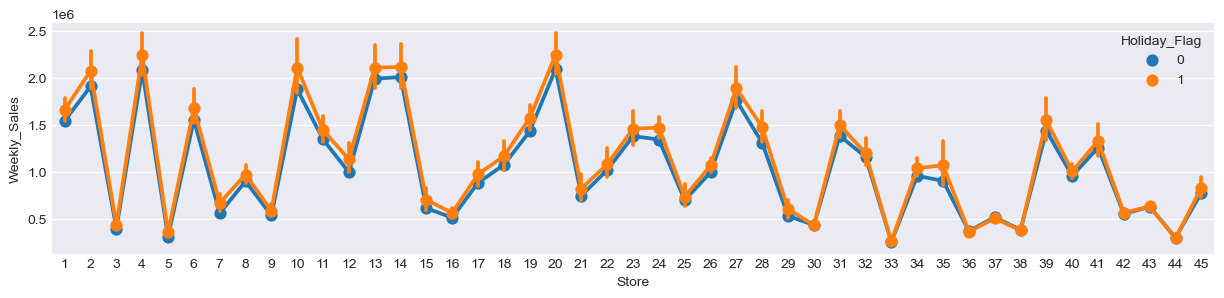

In [495]:
stores = deepcopy(data)
store_sales = stores.groupby(['Date', 'Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()

fig = plt.figure(figsize=(15,3))
sns.pointplot(store_sales, x='Store', y='Weekly_Sales', hue='Holiday_Flag')

#### From here we can see the top performers and the worst performers, with a spot comparison between Holiday weeks and non Holiday weeks

----------

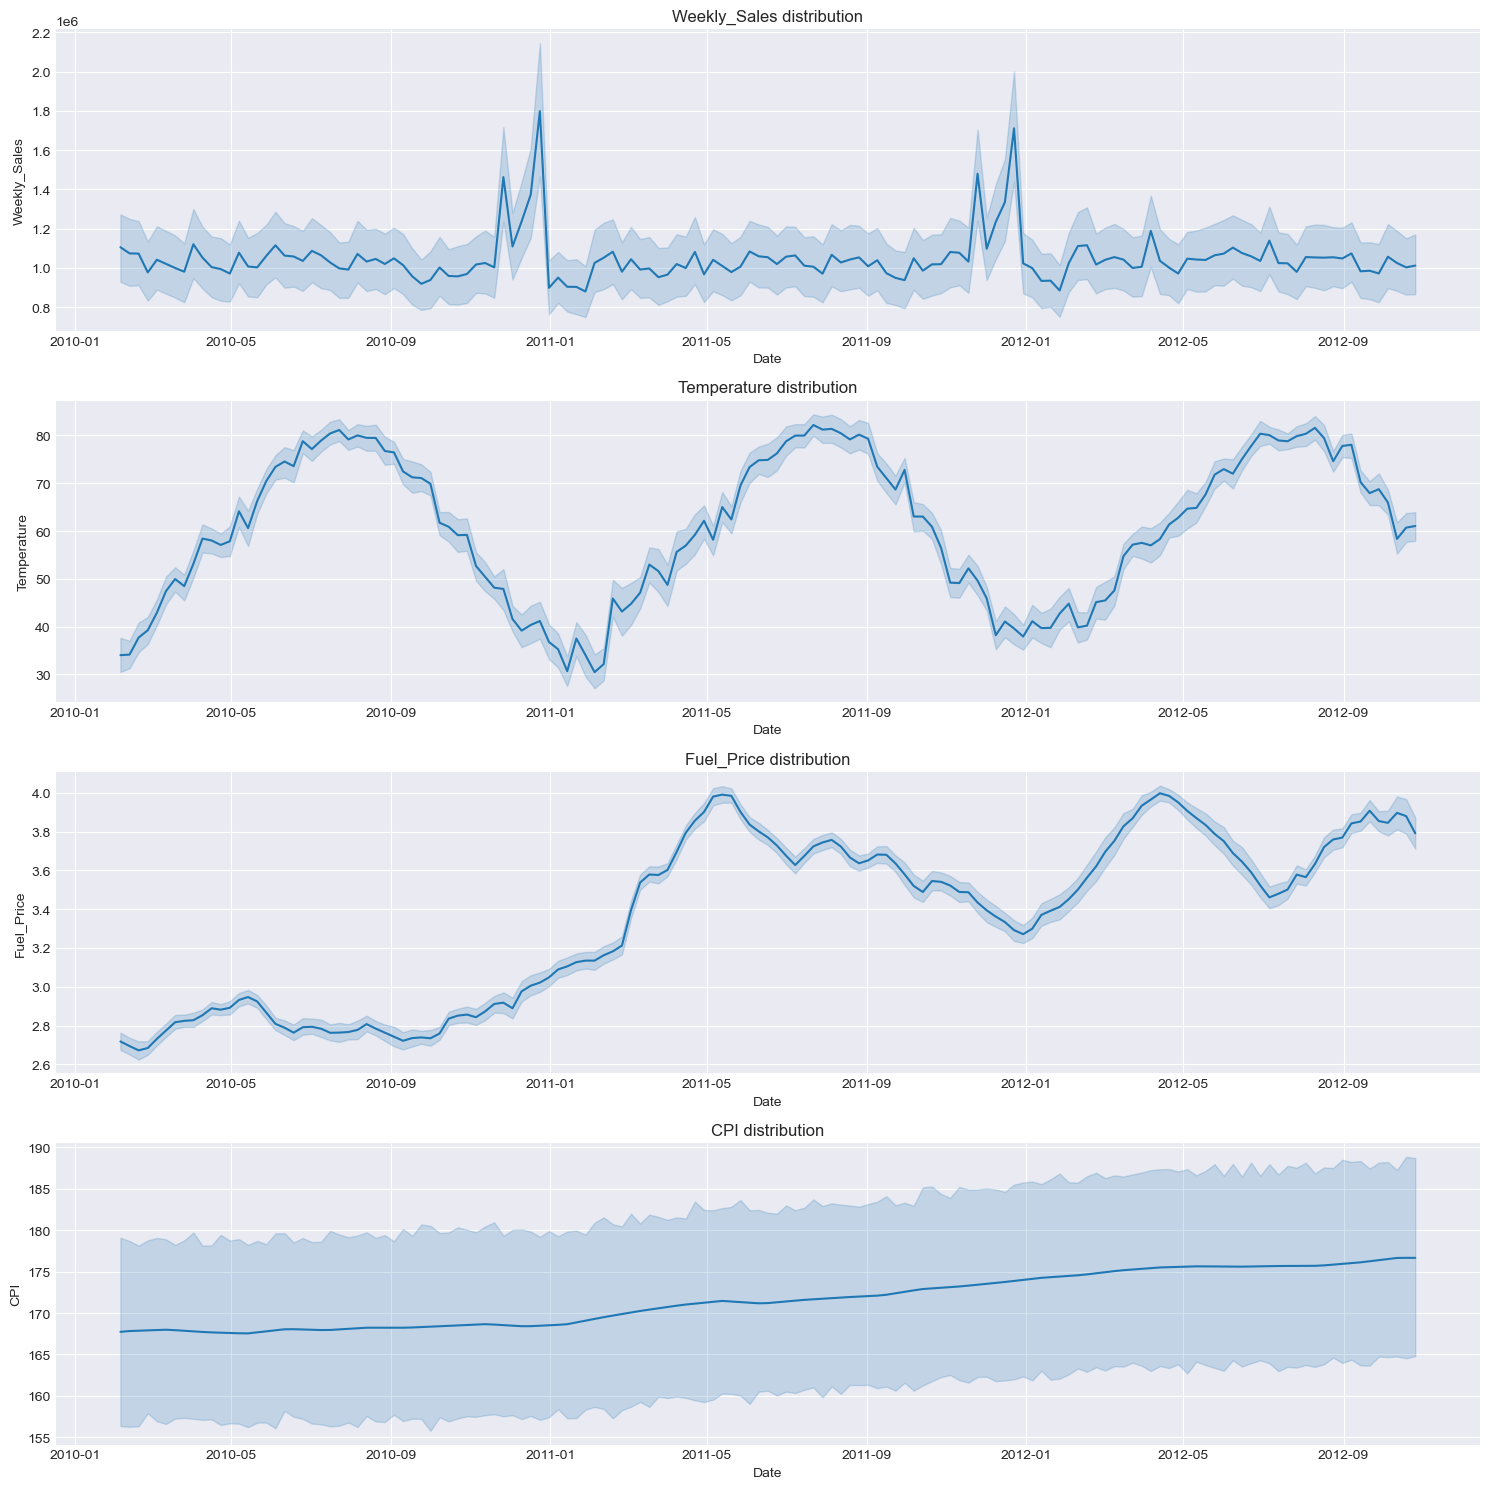

In [496]:
fig, axes = plt.subplots(nrows=4, figsize=(15,15))

axes.flatten()

cols = ['Weekly_Sales'
        , 'Temperature'
        , 'Fuel_Price'
        , 'CPI'
        , 'Unemployment']

for ax, col in zip(axes, cols):
    sns.lineplot(ax=ax, data=data, x=data.index, y=col)
    ax.grid(True)
    ax.set_title(f'{col} distribution')

plt.tight_layout()
plt.show()

In [497]:
data.groupby(data.index.year)['Fuel_Price'].agg(['min', 'max', 'mean'])

,min,max,mean
Date,,,
2010,2.472,3.336,2.823767
2011,2.882,4.211,3.561915
2012,3.031,4.468,3.709776


#### there seems to be some kind of seasonality around december - january
#### temperature has a seasonal trend but with very large peaks
#### fuel price is rising YoY

-------------

## Seasonal Decomposition

In [498]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomposition(data, col):

    add_seasonal_dec = seasonal_decompose(data[col], model='additive', period=12)
    mul_seasonal_dec = seasonal_decompose(data[col], model='multiplicative', period=12)

    fig1 = add_seasonal_dec.plot()
    fig1.suptitle("Additive Decomposition")
    fig1.set_size_inches((15,7))

    fig2 = mul_seasonal_dec.plot()
    fig2.suptitle("Multiplicative Decomposition")
    fig2.set_size_inches((15,7))

In [499]:
from copy import deepcopy

weekly_data = deepcopy(data.reset_index())
weekly_data.drop(['Store'], axis=1, inplace=True)

grouped_weekly = weekly_data.groupby('Date').mean()

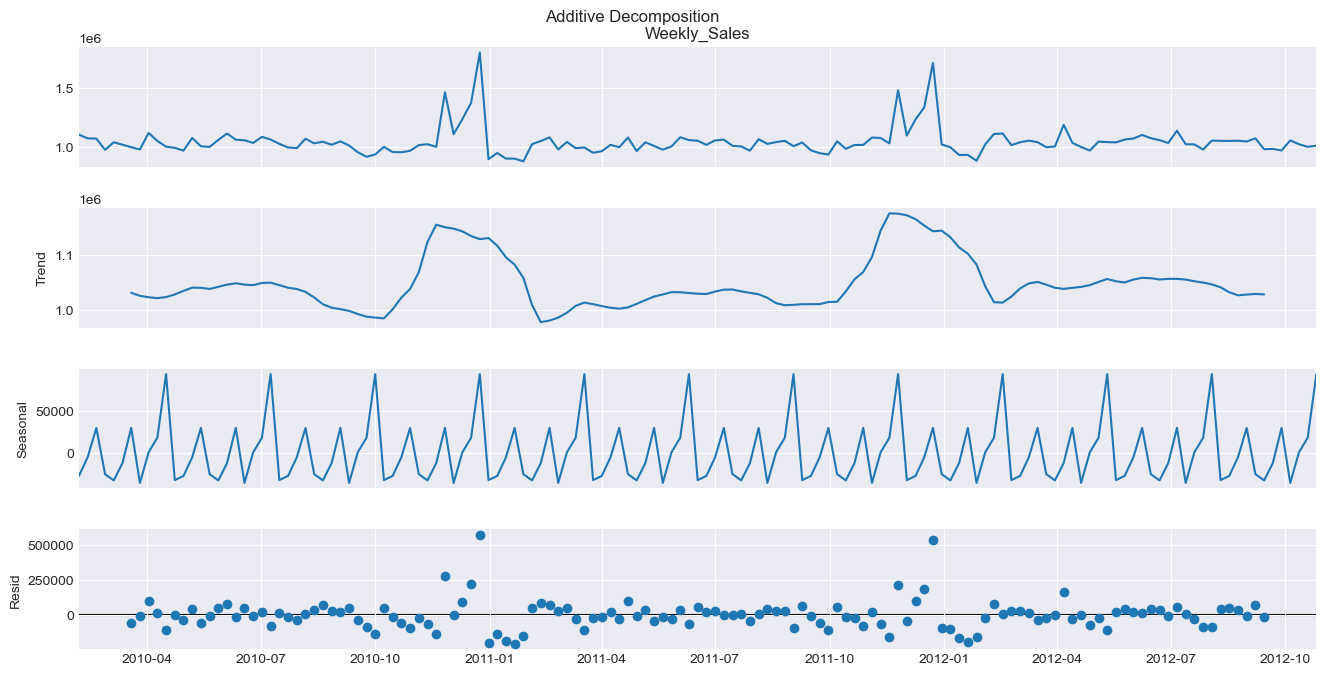

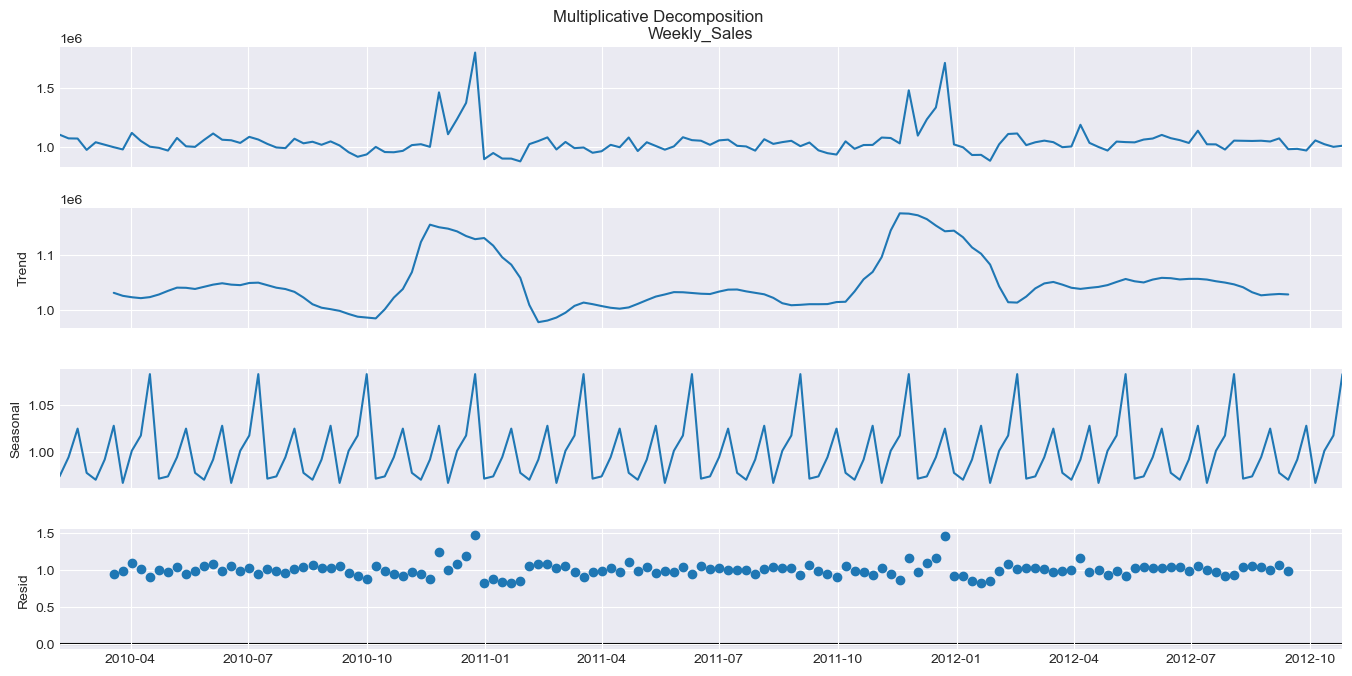

In [500]:
seasonal_decomposition(grouped_weekly, 'Weekly_Sales')

#### Residuals: Those huge positive outliers in December/January indicate that even your “average holiday bump” isn’t enough to capture the true spike—there’s extra variability

## YoY and MoM distribution

In [501]:
from copy import deepcopy

data_MoM = deepcopy(data)
data_MoM['Year'] = data.index.year
data_MoM['Month'] = data.index.month
data_MoM.drop(['Store'], axis=1, inplace=True)

data_MoM_grouped = data_MoM.groupby(['Year', 'Month']).mean()

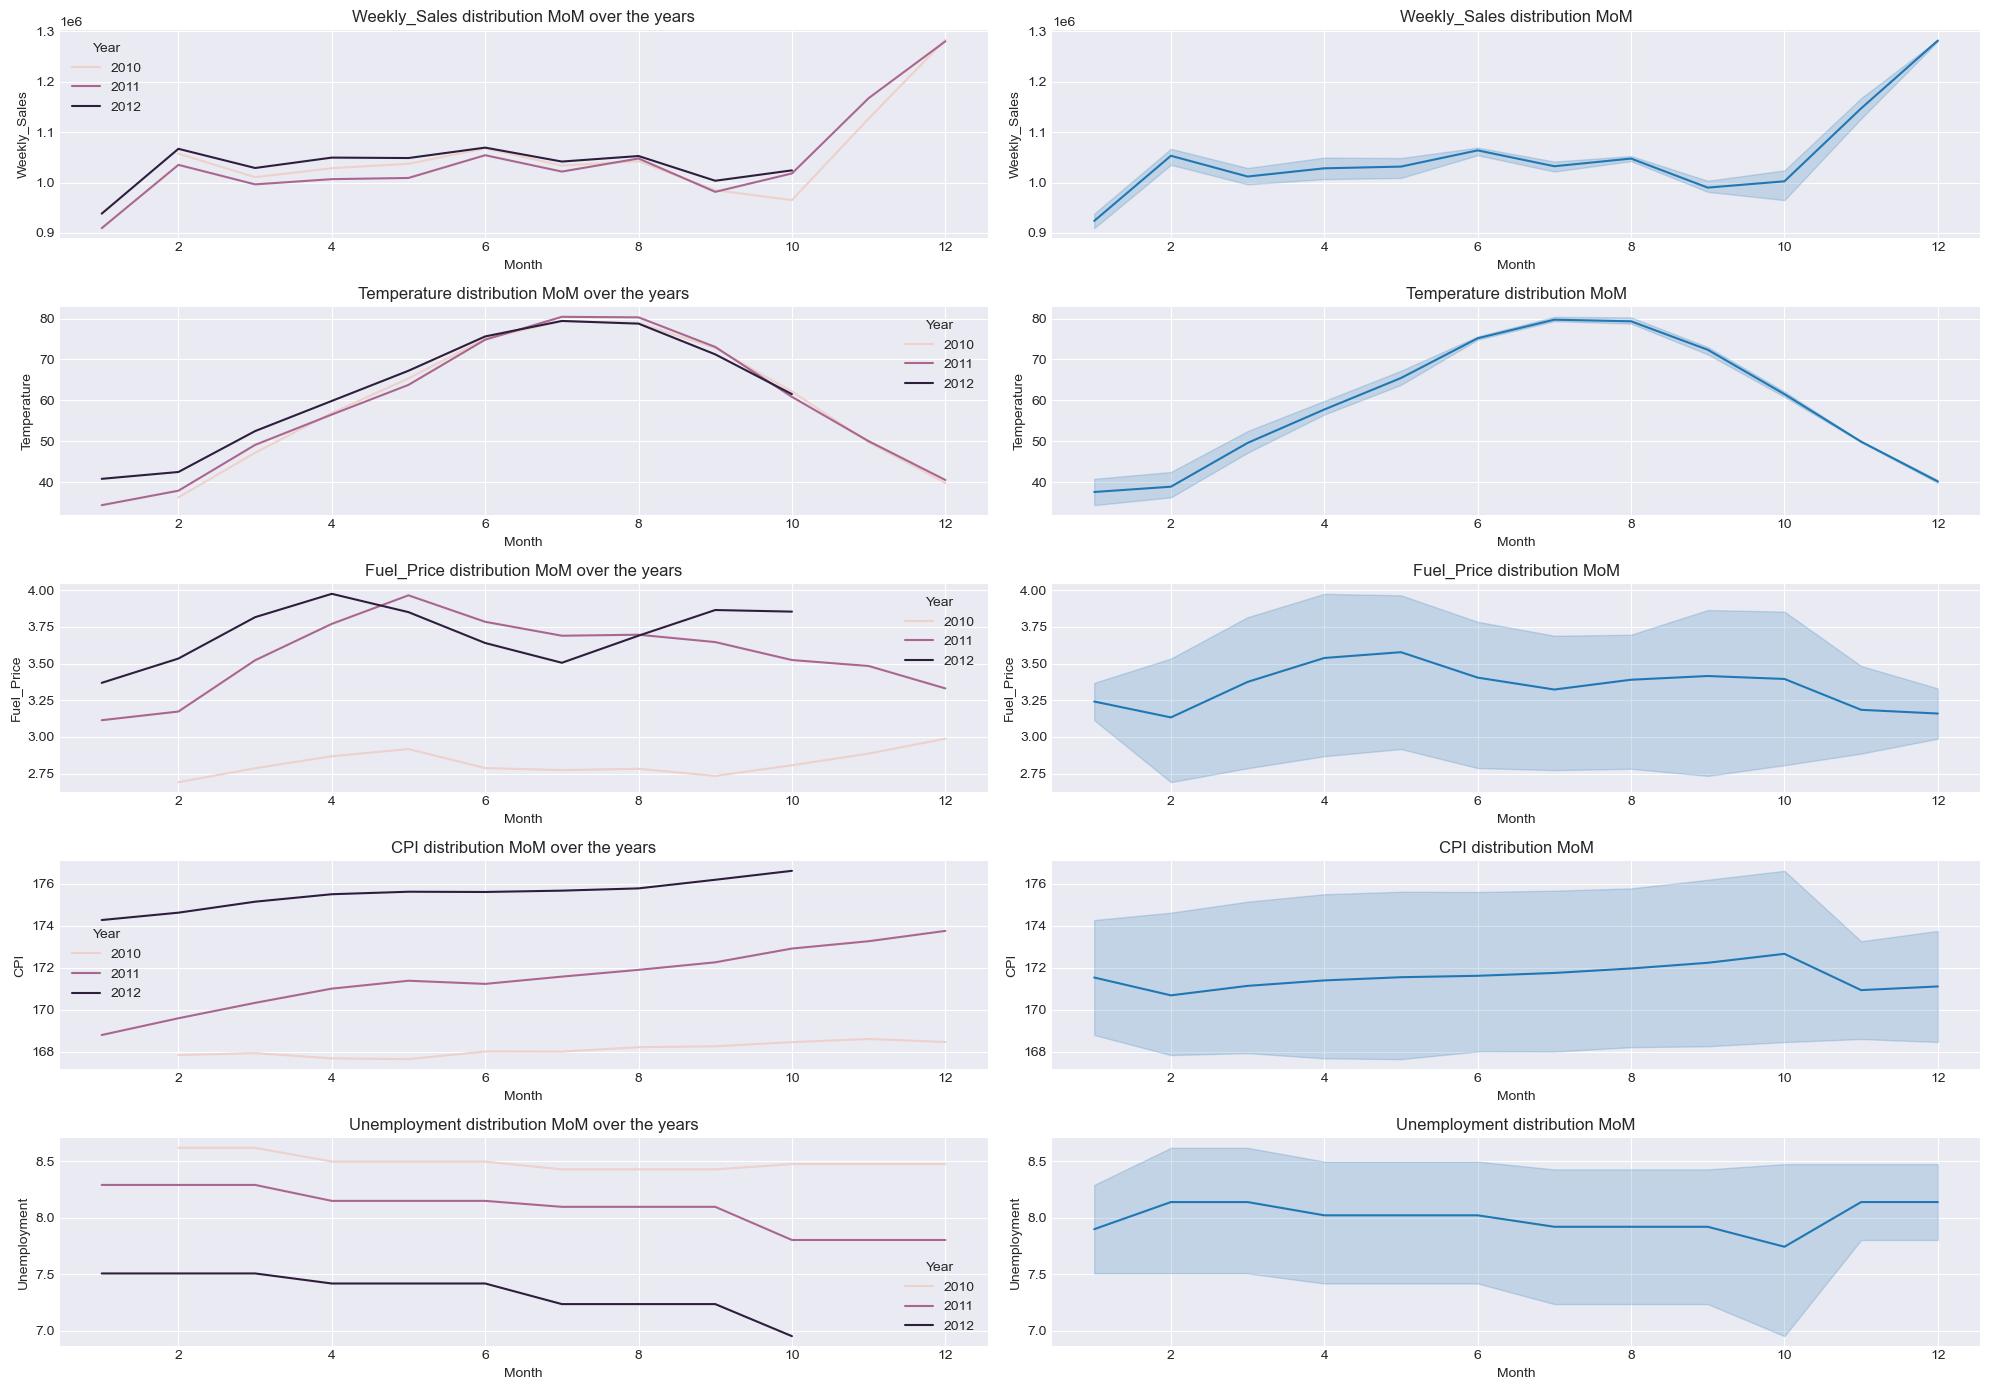

In [502]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,14))

for i, (ax, col) in enumerate(zip(axes.flatten(), cols)):

    ax1=axes[i,0]
    ax2=axes[i,1]

    sns.lineplot(ax=ax1, data=data_MoM_grouped, x='Month', y=col, hue='Year')
    ax1.set_title(f'{col} distribution MoM over the years')

    sns.lineplot(ax=ax2, data=data_MoM_grouped, x='Month', y=col)
    ax2.set_title(f'{col} distribution MoM')

plt.tight_layout()
plt.show()

#### Weekly sales have risen both month-over-month and year-over-year.
#### Temperatures exhibit a regular cyclical pattern.
#### Fuel prices are up year-over-year, and continue to tick upward steadily each month.
#### Unemployment has declined year-over-year, and shows gradual month-over-month decreases—with a sharp drop beginning in November

##### The November decline in unemployment aligns with the surge in weekly sales, suggesting a period of elevated demand for both labor and products

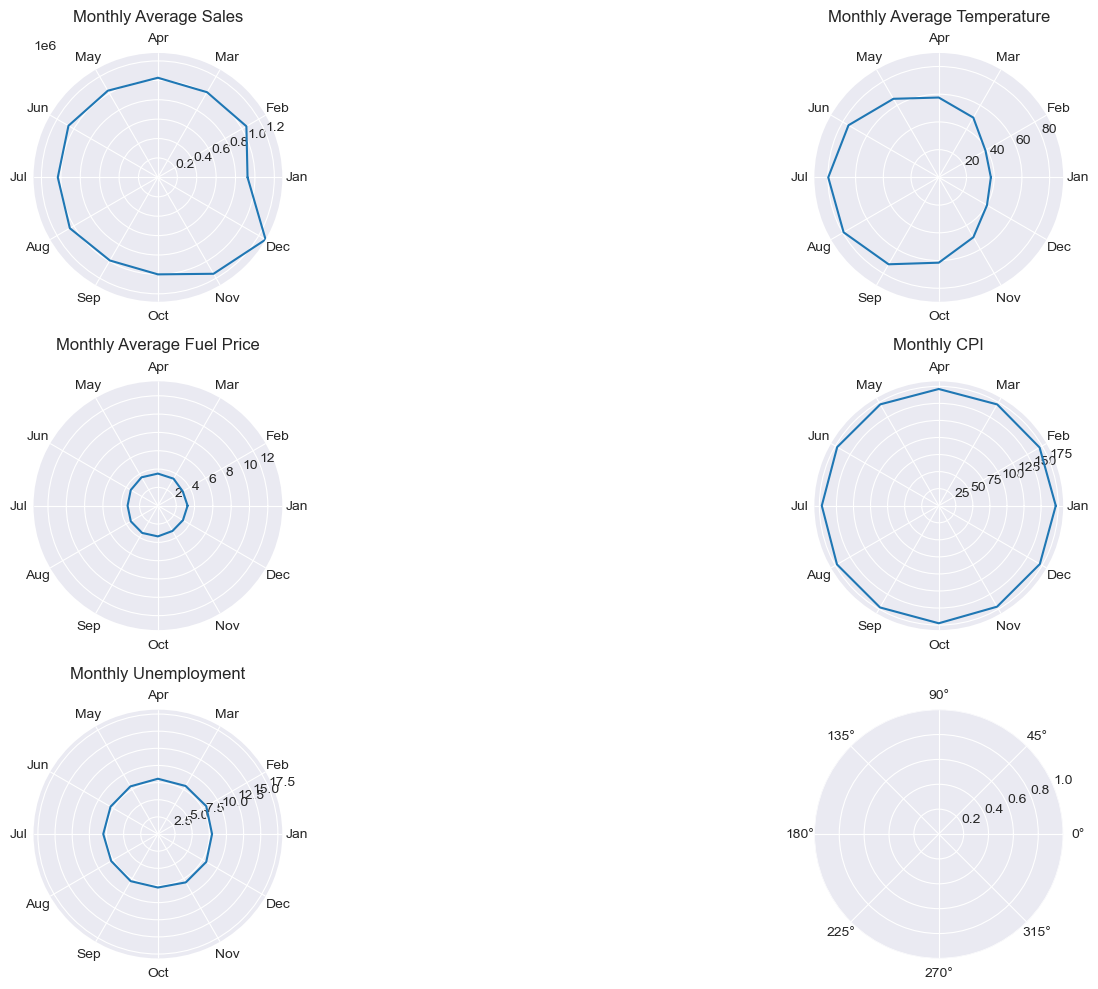

In [503]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(ncols=2, nrows=3, subplot_kw={'projection': 'polar'}, figsize=(20, 10))

parameters = cols

titles = ['Monthly Average Sales', 'Monthly Average Temperature', 
        'Monthly Average Fuel Price', 'Monthly CPI', 'Monthly Unemployment']


for ax, param, title in zip(axs.flatten(), parameters, titles):

    monthly_avg = data_MoM.groupby(by='Month')[param].mean()

    theta = np.linspace(0, 2 * np.pi, len(monthly_avg), endpoint=False) 
    radii = monthly_avg.values 

    theta = np.append(theta, theta[0])
    radii = np.append(radii, radii[0])
    
    ax.plot(theta, radii)
    ax.set_title(title, va='bottom')
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                        'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    ax.set_ylim(0, radii.max() + 10)
    

plt.tight_layout()
plt.show()

#### The CPI isn’t providing meaningful insights here
#### As noted earlier, fuel prices are climbing year-over-year at a gradual pace, while the month-over-month distribution stays largely unchanged with only minor fluctuations.
#### The sales, temperature, and unemployment series are not revealing any new information.

----------------

## Correlation

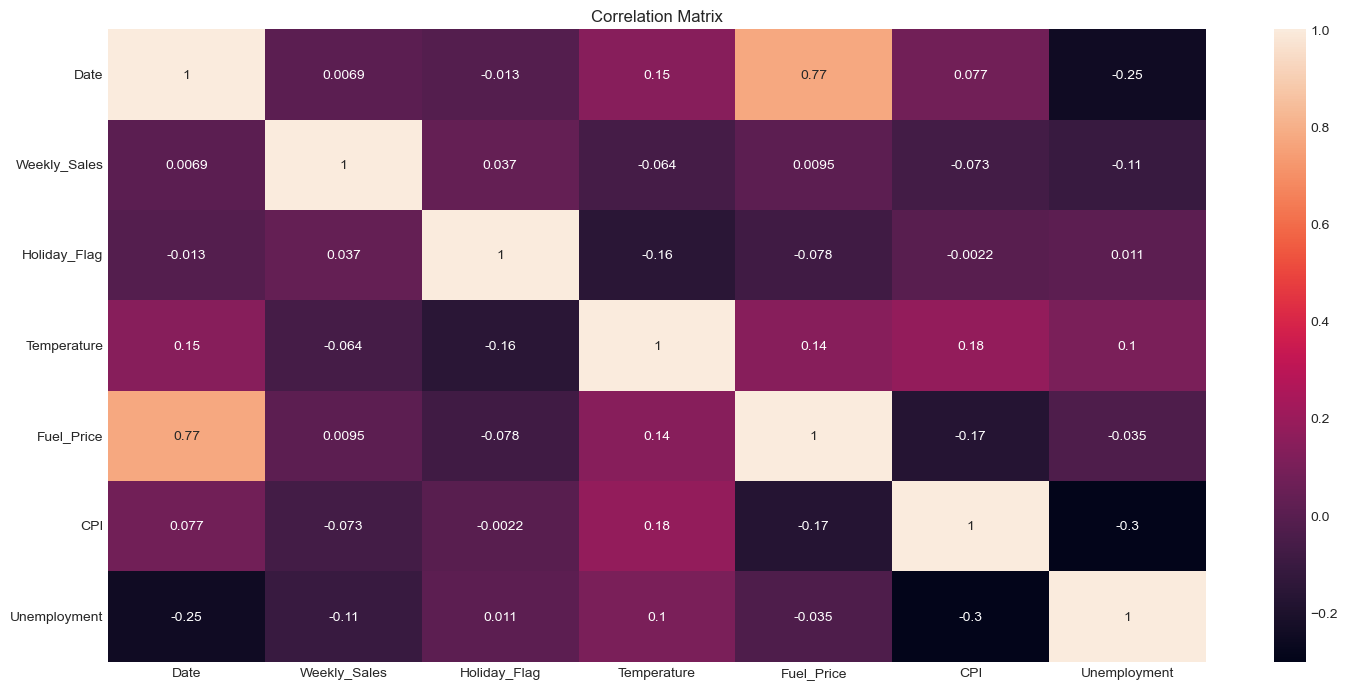

In [504]:
correlation = weekly_data.corr()

fig = plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot=True)

plt.title("Correlation Matrix")
plt.tight_layout()

#### Weekly sales and unemployment move in opposite directions, confirming their negative correlation.
#### The holiday indicator shows the strongest relationship with weekly sales.
#### There appears to be a time-based correlation with fuel prices—let’s investigate that further.

Text(0.5, 1.0, 'Fuel price')

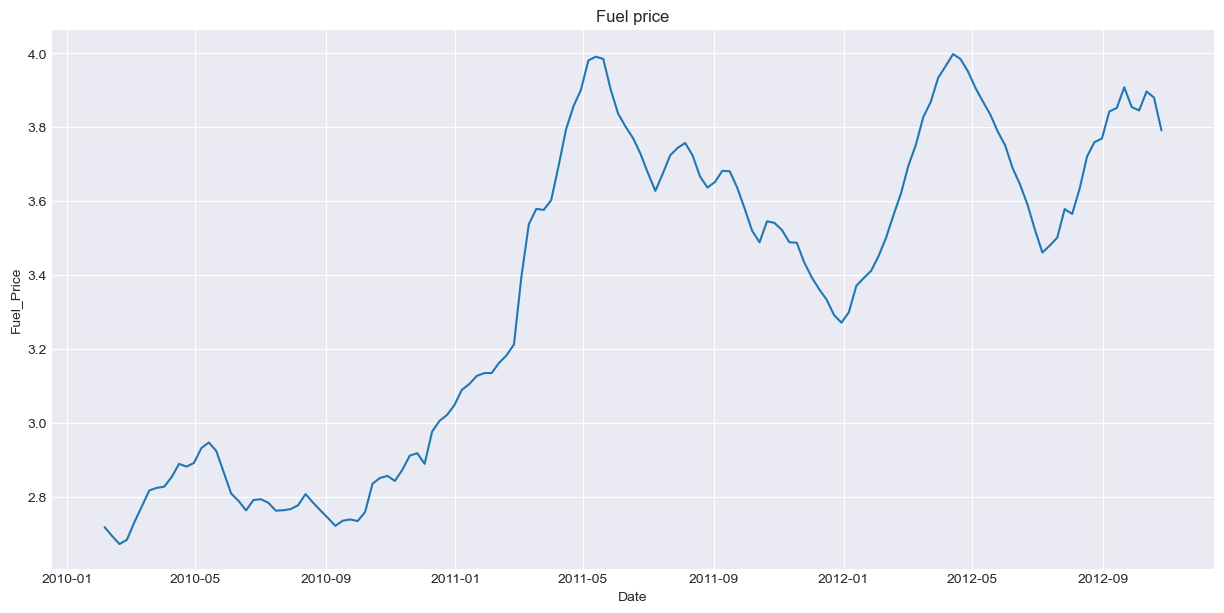

In [505]:
fuel_plot = weekly_data.groupby('Date')['Fuel_Price'].mean()

fig = plt.figure(figsize=(15,7))
sns.lineplot(fuel_plot)
plt.title("Fuel price")

#### fuel price is increasing indicatively during the period between april and september but this graph undedrlines a huge variability due to those peaks in July/August 2011 and Jan 2012

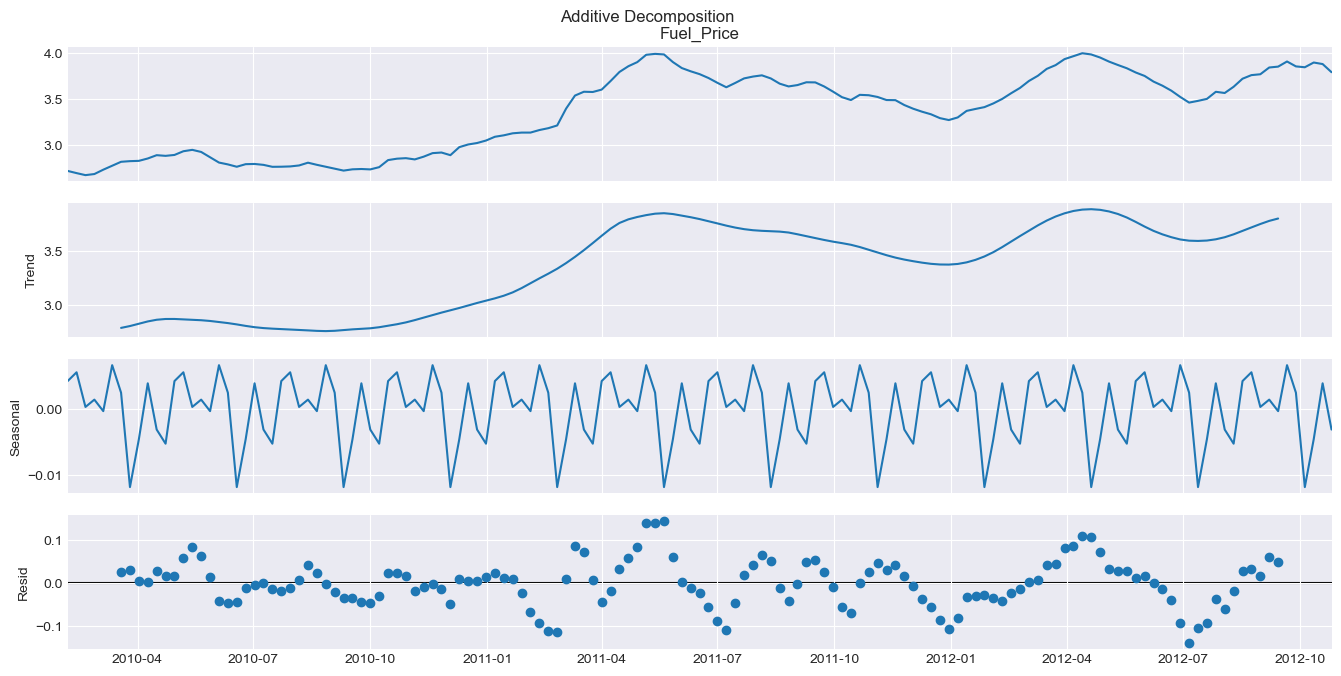

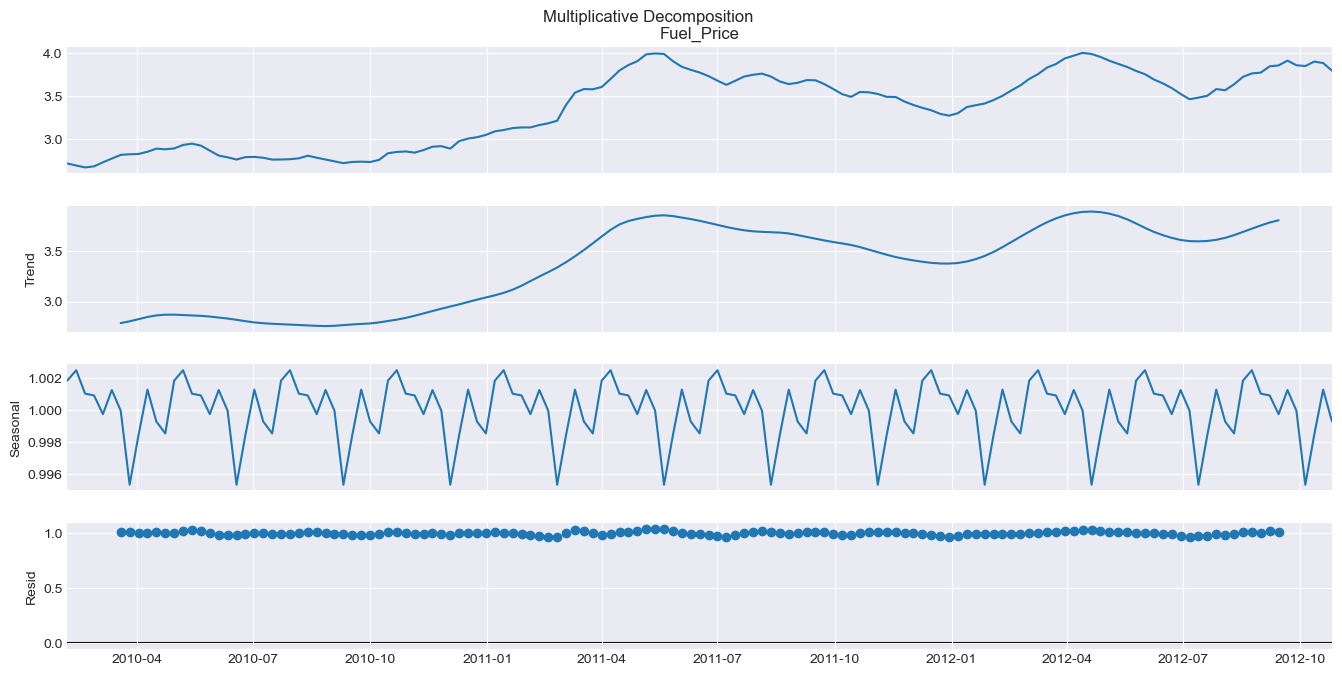

In [506]:
seasonal_decomposition(grouped_weekly, 'Fuel_Price')

----------------------------

## Forecast with ARIMA

In [575]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
forecast_df = deepcopy(weekly_data.groupby(by='Date')['Weekly_Sales'].sum().reset_index())

forecast_df_feature_selected = forecast_df[['Date', 'Weekly_Sales']]
forecast_df_feature_selected.set_index('Date', inplace=True)

y = forecast_df_feature_selected['Weekly_Sales']

In [618]:
def kpss_adff_testing(df, col):

    print(colored(f'Testing for {col}\n', color='yellow', attrs=['bold']))

    kpss_stat, p_value, lags, crit = kpss(df[col])

    print("*" * 40, "KPSS Test", "*" * 40, "\n")

    print(f" KPSS: {kpss_stat},\n p_value: {p_value},\n lags: {lags},\n crit: {crit}\n")

    if p_value < 0.05:
        print(colored('The Series is NOT stationary - KPSS\n', color='red', attrs=['bold']))
    else:
        print(colored('The Series is Stationary - KPSS\n', color='green', attrs=['bold']))

    adff_stat, adff_pvalue, adff_lags, nobs, adff_crit, icbest = adfuller(df[col])

    print("*" * 40, "ADFF Test", "*" * 40, "\n")

    print(f" ADFF: {adff_stat},\n p_value: {adff_pvalue},\n lags: {adff_lags},\n nobs: {nobs},\n critical values: {adff_crit},\n icbest: {icbest}\n")

    if adff_pvalue > 0.05:
        print(colored('The Series is NOT stationary - ADFF', color='red', attrs=['bold']))
    else:
        print(colored('The Series is Stationary - ADFF', color='green', attrs=['bold']))

    print("=" * 40,"\n")

In [619]:
kpss_adff_testing(forecast_df, 'Weekly_Sales')

Testing for Weekly_Sales

**************************************** KPSS Test **************************************** 

 KPSS: 0.048891629110780106,
 p_value: 0.1,
 lags: 5,
 crit: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

The Series is Stationary - KPSS

**************************************** ADFF Test **************************************** 

 ADFF: -5.908297957186336,
 p_value: 2.675979158986003e-07,
 lags: 4,
 nobs: 138,
 critical values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056},
 icbest: 4314.46014989216

The Series is Stationary - ADFF



#### mismatched tests, let's delve into it looking at the acf and pacf graphs

### ACF / PACF -> d = 0

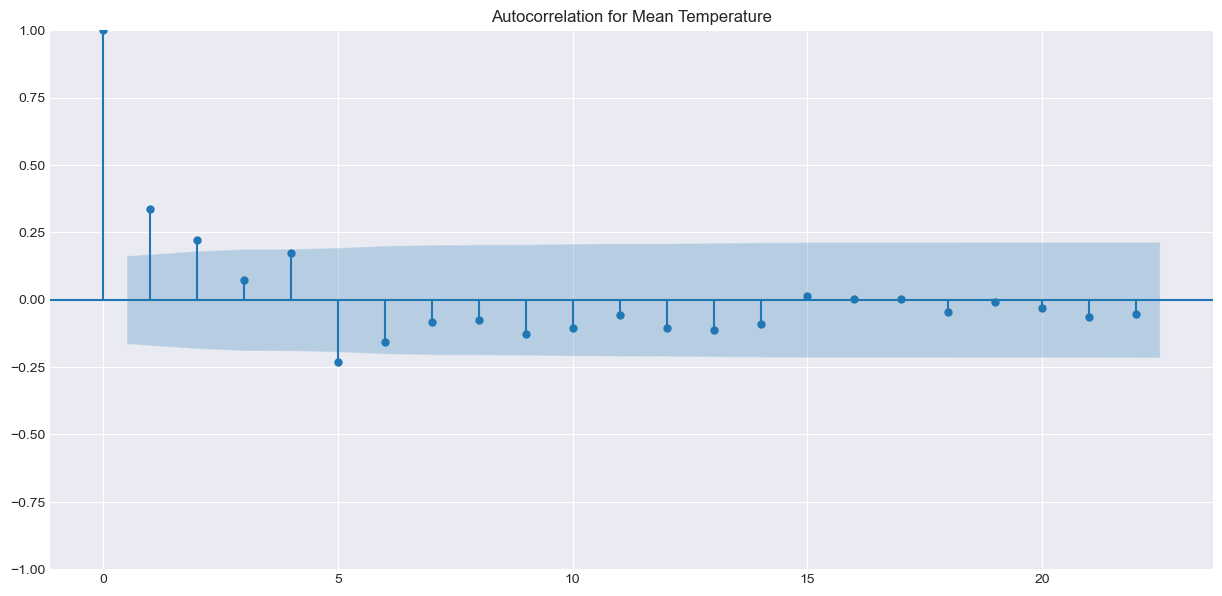

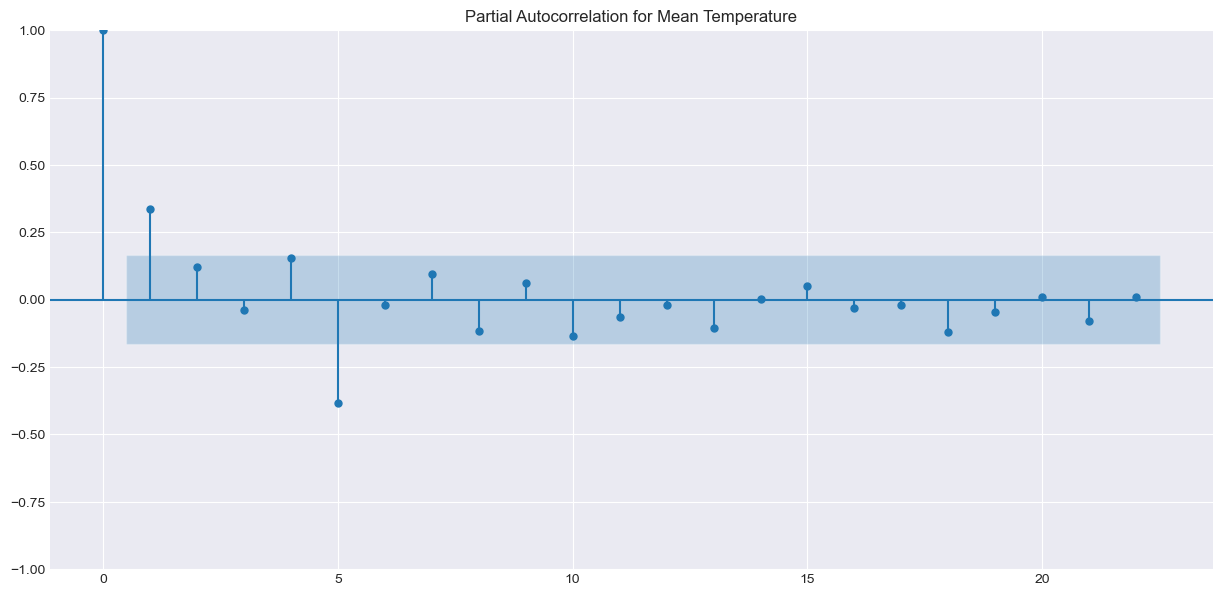

In [620]:
acf_plot = plot_acf(y, title='Autocorrelation for Mean Temperature')
acf_plot.set_size_inches((15,7))

pacf_plot = plot_pacf(y, title='Partial Autocorrelation for Mean Temperature')
pacf_plot.set_size_inches((15,7))

In [645]:
from pmdarima import auto_arima

model = auto_arima(
                    y, 
                    start_p = 1, 
                    start_q = 1,
                    max_p = 4, 
                    max_q = 4, 
                    m = 52,
                    start_P = 0, 
                    seasonal = True,
                    trace = True,
                    error_action ='ignore',   
                    suppress_warnings = True,
                    stepwise = True
                ) 

print("-" * 25)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=4790.386, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=4830.601, Time=0.03 sec
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=4783.566, Time=1.61 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=4783.298, Time=3.29 sec
 ARIMA(1,0,1)(2,0,0)[52] intercept   : AIC=4785.193, Time=37.83 sec
 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=inf, Time=42.50 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=4835.823, Time=2.74 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=4.62 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=4831.381, Time=0.24 sec
 ARIMA(2,0,1)(2,0,0)[52] intercept   : AIC=4780.889, Time=59.05 sec
 ARIMA(2,0,1)(1,0,1)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -2376.907
Date:                             gio, 01 mag 2025   AIC                           4767.813
Time:                                     16:12:10   BIC                           4788.553
Sample:                                 02-05-2010   HQIC                          4776.241
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.103e+07   1.59e-08   1.95e+15      0.000     3.1e+07     3.1e+07
ar.L1         -0.8263      0.277     -2.982      0.003      -1.370      -0.283
ar.L2         -0.1655      0.411     -0.403      0.687      -0.971       0.640
ma.L1          1.2206      0.284      4.302      0.000       0.665       1.777
ma.L2          0.6215      0.272      2.282      0.022       0.088       1.155
ar.S.L52       0.6713      0.041     16.271      0.000       0.590       0.752
sigma2      2.389e+13   1.82e-14   1.31e+27      0.000    2.39e+13    2.39e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               891.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.76e+43. Standard errors may be unstable.
"""

#### --> LB pvalue > 0.05 so the residuals are not autocorrelated
#### --> JB pvalue < 0.05 so the residuals are not normally distributed
#### --> LOW Heteroskedasticity
#### --> HIGH Skew

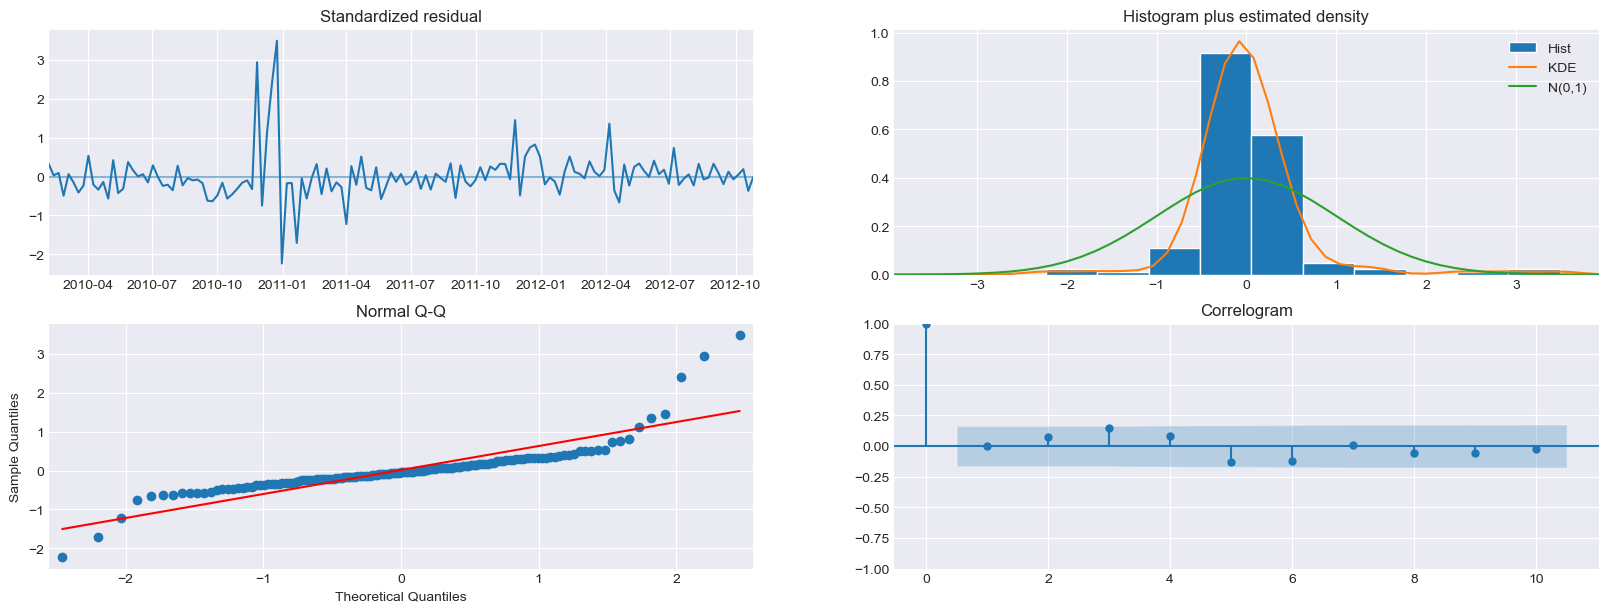

In [646]:
model.plot_diagnostics(figsize=(20,7))
plt.show()

#### the QQ Plot tails are badly fitted

#### The standardized‐residual trace shows a handful of very large shocks (±4–6σ) around early 2011 and early 2012—exactly where our holiday/intervention windows sit (Super Bowl, etc.). In other words, the current model is treating those events as “outliers,” because it has no way to explain them.

------------

## First order differentiation -> d = 1

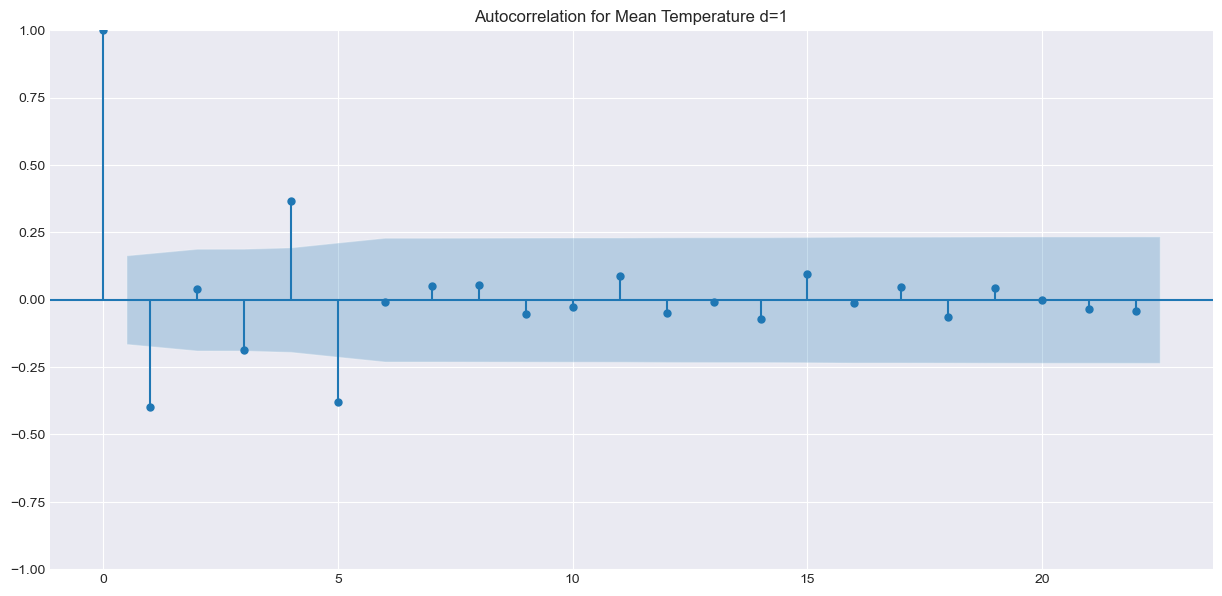

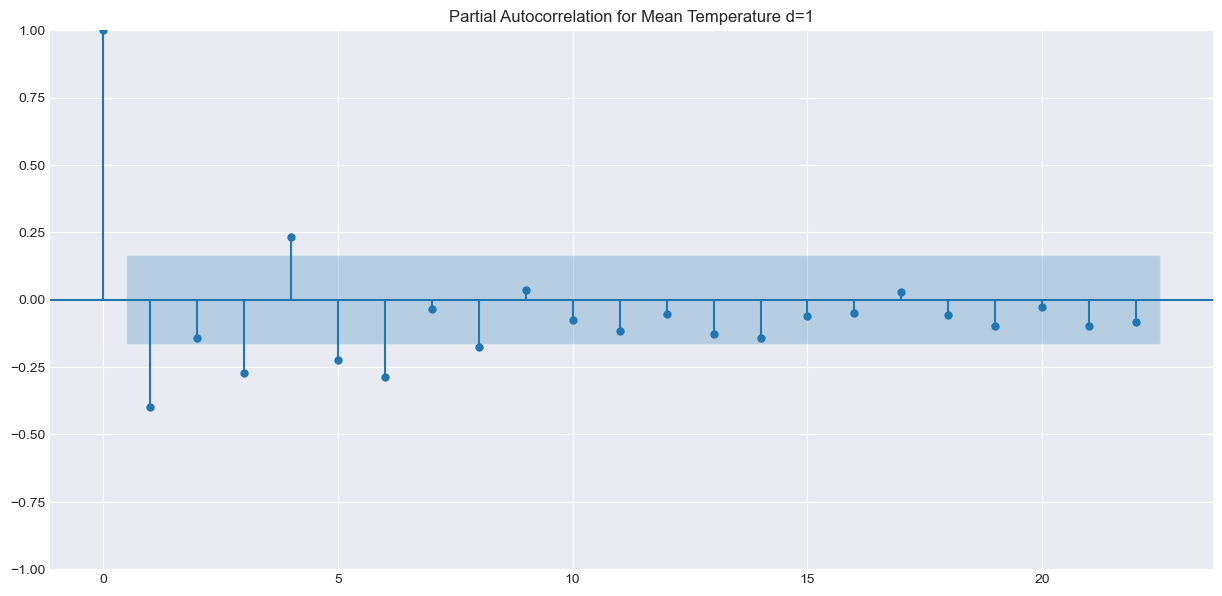

In [647]:
def differentiate(df):

    df_log = np.log1p(df)
    df_diff = df_log.diff(1).dropna()

    return df_diff

forecast_df_diff = differentiate(forecast_df_feature_selected)

acf_plot = plot_acf(forecast_df_diff, title='Autocorrelation for Mean Temperature d=1')
acf_plot.set_size_inches((15,7))

pacf_plot = plot_pacf(forecast_df_diff, title='Partial Autocorrelation for Mean Temperature d=1')
pacf_plot.set_size_inches((15,7))

y_diff = forecast_df_diff['Weekly_Sales']

-------------------

## Train Test Split

In [ ]:
import math

X = forecast_df['Date']
X_train, X_test, y_train, y_test = X.iloc[: math.floor(len(forecast_df) * 0.80)], X.iloc[math.ceil(len(forecast_df) * 0.80) :], y.iloc[: math.floor(len(y)* 0.80)], y.iloc[math.ceil(len(y)*0.80):]

In [681]:
from pmdarima import auto_arima

model_diff = auto_arima(
                    y_train, 
                    start_p = 1, 
                    start_q = 1,
                    max_p = 4, 
                    max_q = 4, 
                    d = 1,
                    m = 52,
                    start_P = 0, 
                    seasonal = True,
                    trace = True,
                    error_action ='ignore',   
                    suppress_warnings = True,
                    stepwise = True
                ) 

print("-" * 25)
model_diff.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=3841.193, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=3883.892, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=3840.244, Time=0.65 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=3842.357, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=3881.899, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=3871.275, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=3842.070, Time=27.54 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=3842.073, Time=0.77 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=3846.549, Time=0.44 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=3844.071, Time=23.59 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=3853.703, Time=1.14 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=3840.203, Time=5.24 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=3871.396, Time=0.40 sec
 ARIMA(2,1,0)(2,0,0)[52] intercept   : AIC=3842.008, Time=26.63 sec
 ARIMA(2,1,0)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 52)   Log Likelihood               -1909.277
Date:                            ven, 02 mag 2025   AIC                           3830.555
Time:                                    13:49:42   BIC                           3846.919
Sample:                                02-05-2010   HQIC                          3837.195
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3137      0.065     -4.842      0.000      -0.441      -0.187
ar.L2         -0.1558      0.095     -1.638      0.101      -0.342       0.031
ar.L3         -0.1114      0.128     -0.872      0.383      -0.362       0.139
ar.L4          0.1457      0.083      1.756      0.079      -0.017       0.308
ar.S.L52       0.4805      0.041     11.637      0.000       0.400       0.561
sigma2      3.423e+13   1.61e-15   2.13e+28      0.000    3.42e+13    3.42e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):               319.71
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.63
Prob(H) (two-sided):                  0.24   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.18e+43. Standard errors may be unstable.
"""

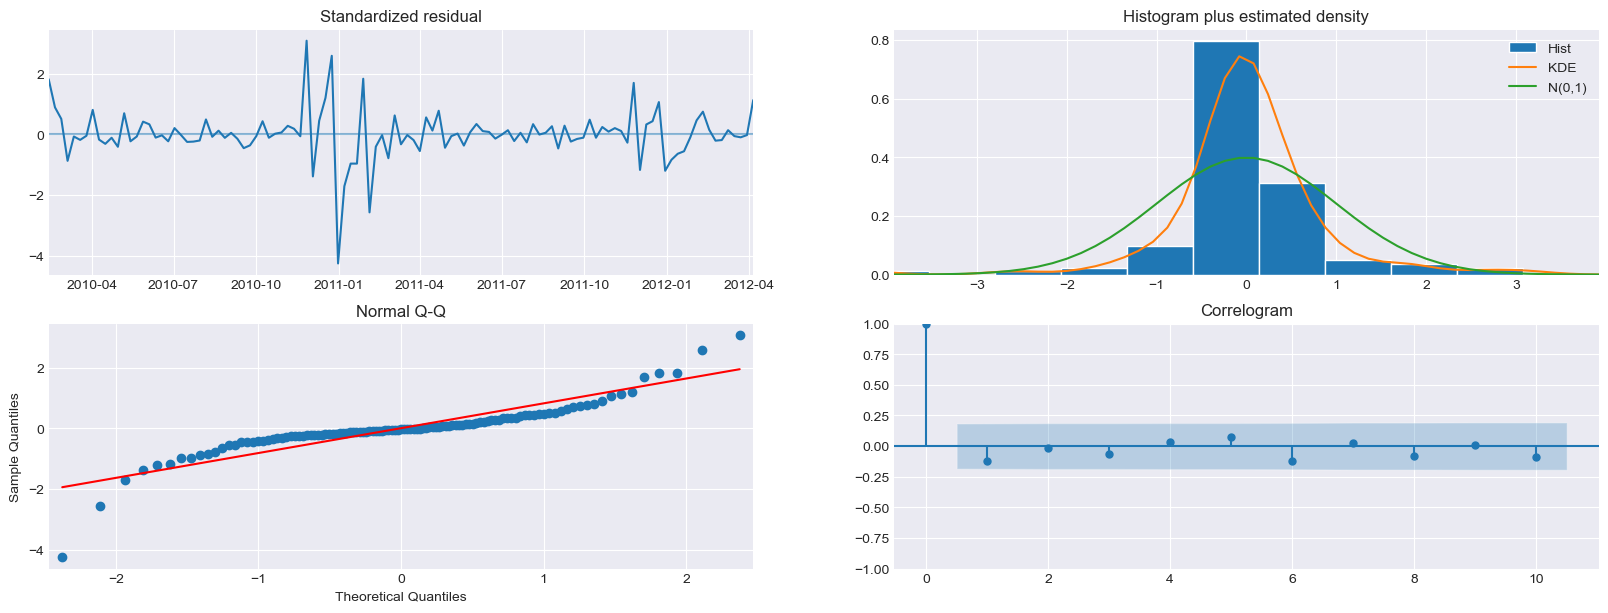

In [682]:
model_diff.plot_diagnostics(figsize=(20,7))
plt.show()

In [720]:
forecasts = model_diff.predict(n_periods=52, return_conf_int=True)

In [730]:
forecasted = forecasts[0]

confidence_interval_arima = pd.DataFrame(forecasts[1])
lower_confidence_interval_arima = confidence_interval_arima.loc[:, 0]
upper_confidence_interval_arima = confidence_interval_arima.loc[:, 1]

In [731]:
from dateutil.relativedelta import relativedelta

forecast_dates = pd.date_range(start=X_train.iloc[-1], end=X_train.iloc[-1] + relativedelta(weeks=52), freq='W-MON')

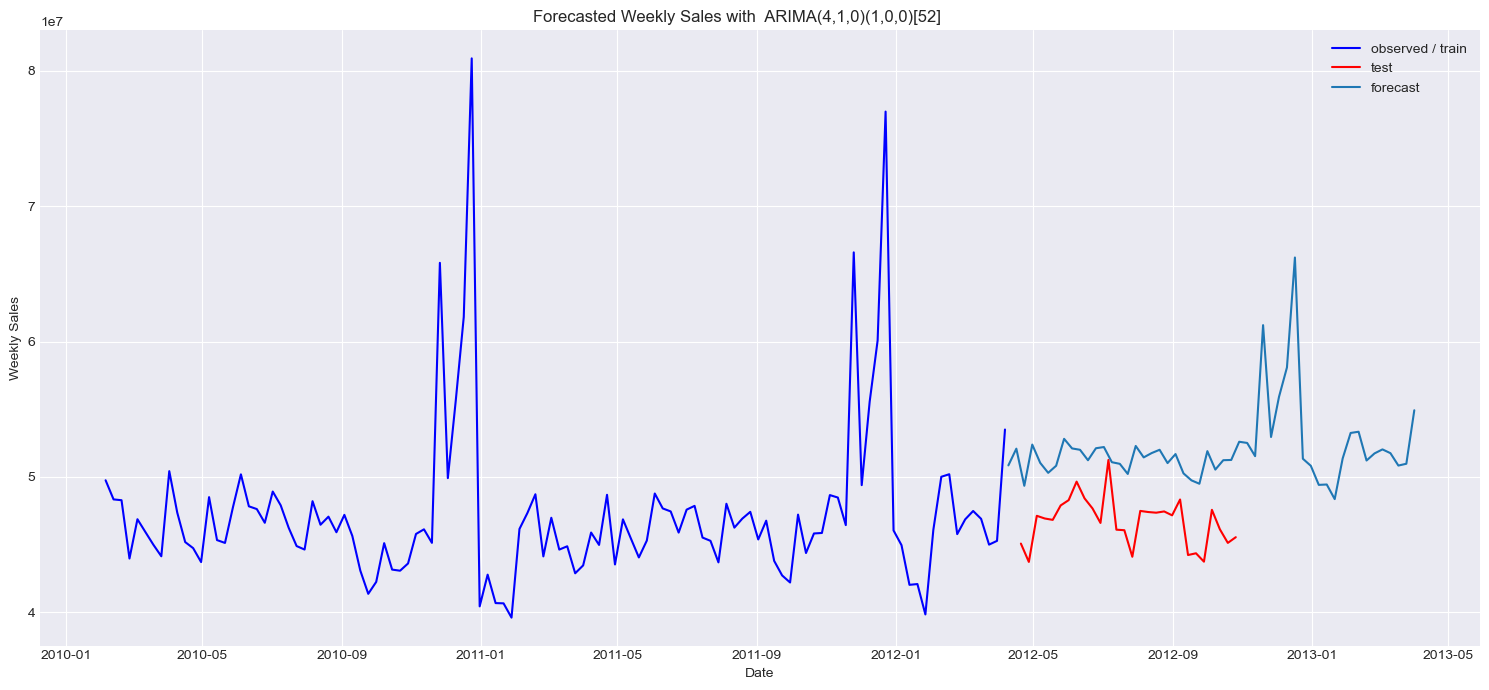

In [738]:
fig = plt.figure(figsize=(15,7))

plt.plot(X_train, y_train, color='blue', label='observed / train')
plt.plot(X_test, y_test, color='red', label='test')

plt.plot(forecast_dates, forecasted, label='forecast')

plt.title(f"Forecasted Weekly Sales with {model_diff}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()